<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/week11/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRACTICUM
Noora Aulia Hidayat

2041720046

TI - 3I

https://github.com/noora20FH/PCVK/blob/week11/week11.ipynb

not recomended to tran Neural Network using your own device but using cloud

In [1]:
from google.colab import drive


#Access my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import PIL.Image

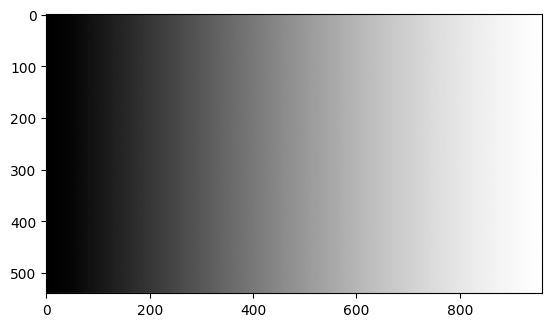

In [ ]:
img_ori = cv.imread('/content/drive/MyDrive/gradient.jpg')

img = cv.cvtColor(img_ori, cv.IMREAD_GRAYSCALE)
plt.imshow(img)

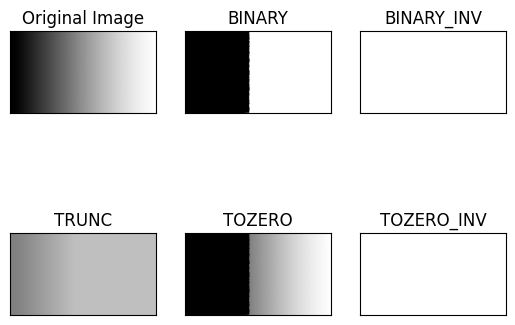

In [ ]:


assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#no. 1 Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,TOZERO_INV) according to the description from the chart shown above.

##BINARY

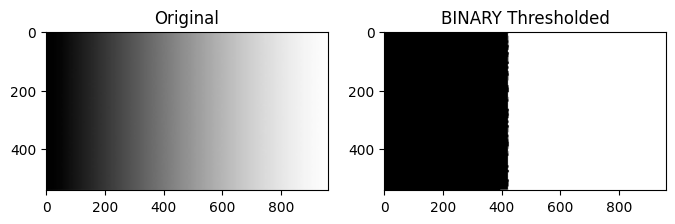

In [ ]:

# Apply thresholding using NumPy
threshold_value = 127
img_thresholded = np.where(img > threshold_value, 255, 0)

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('BINARY Thresholded')
plt.show()

##BINARY_INV

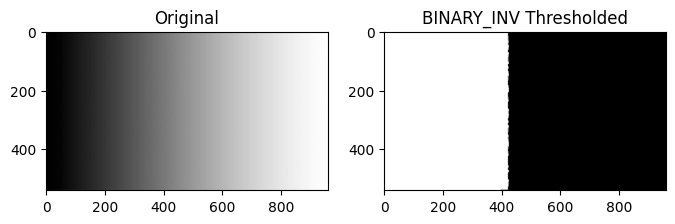

In [ ]:

img_arr = np.array(img)

# Apply thresholding using NumPy
threshold_value = 127
# img_thresholded = np.where(img > threshold_value, 0, 255)

# Create a binary image with inverse thresholding
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 0
        else:
            img_thresholded[i, j] = 255


# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('BINARY_INV Thresholded')
plt.show()

##TRUNCT

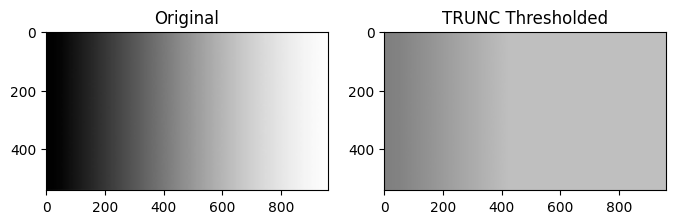

In [ ]:
# Apply thresholding using NumPy
threshold_value = 127
img_thresholded = np.where(img > threshold_value, threshold_value, img)

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('TRUNC Thresholded')
plt.show()

##TOZERO

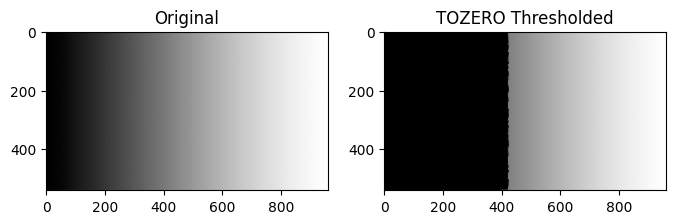

In [ ]:
# Set the threshold value
threshold_value = 127

# Apply the thresholding with TOZERO_INV
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = img_arr[i, j]
        else:
            img_thresholded[i, j] = 0
            

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('TOZERO Thresholded')
plt.show()

##TOZERO_INV

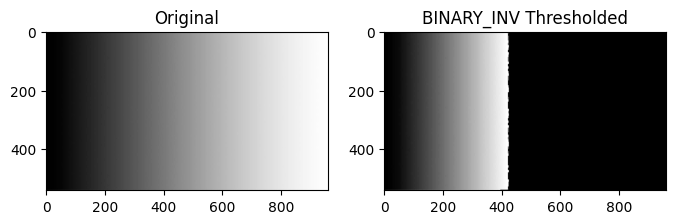

In [ ]:

# Set the threshold value
threshold_value = 127

# Apply the thresholding with TOZERO_INV
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 0
        else:
            
            img_thresholded[i, j] = img_arr[i, j]

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('BINARY_INV Thresholded')
plt.show()

#NO. 2 Create Otsu Thresholding without using the Library. Also display the threshold value when you use Otsu's, as shown in the following image . (use the image lena_gs_lc2.jpg so that it really looks different between the otsu's results and the usual global threshold)

In [ ]:
import numpy as np
from PIL import Image

# Load the grayscale image
img = Image.open('/content/drive/MyDrive/lena_gs_lc2.jpg').convert('L')
img_arr = np.array(img)

# Calculate the histogram of pixel intensities
hist, bins = np.histogram(img_arr, bins=256, range=(0, 255))

# Calculate the cumulative sum of the histogram
cumsum = np.cumsum(hist)

# Calculate the cumulative sum of intensities
cumsum_intensity = np.cumsum(hist * np.arange(256))

# Calculate the total number of pixels
total_pixels = img_arr.shape[0] * img_arr.shape[1]

# Initialize variables for storing the maximum between-class variance and threshold value
max_var = 0
threshold_value = 0

# Loop over all possible threshold values
for t in range(256):
    # Calculate the number of foreground pixels and background pixels
    w1 = cumsum[t]
    w2 = total_pixels - w1
    
    # Skip thresholds where one of the classes has no pixels
    if w1 == 0 or w2 == 0:
        continue
    
    # Calculate the mean intensities of the foreground and background pixels
    mean1 = cumsum_intensity[t] / w1
    mean2 = (cumsum_intensity[255] - cumsum_intensity[t]) / w2
    
    # Calculate the between-class variance
    var_between = w1 * w2 * (mean1 - mean2) ** 2
    
    # Update the maximum between-class variance and threshold value if necessary
    if var_between > max_var:
        max_var = var_between
        threshold_value = t

# Apply the Otsu thresholding
rows, cols = img_arr.shape
img_otsu_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_otsu_thresholded[i, j] = 255
        else:
            img_otsu_thresholded[i, j] = 0



In [ ]:

img_ori = cv.imread('/content/drive/MyDrive/lena_gs_lc2.jpg')

img = cv.cvtColor(img_ori, cv.IMREAD_GRAYSCALE)


threshold_value = 127
# Apply the thresholding with BINARY
rows, cols = img_arr.shape
img_binary_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 255
        else:
            img_thresholded[i, j] = 0

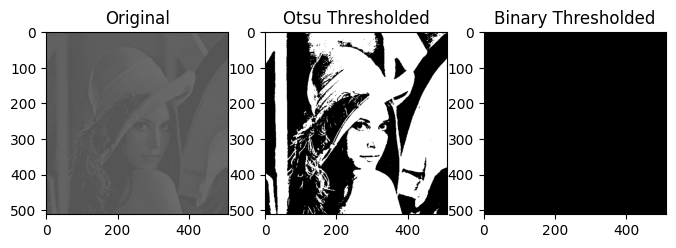

In [ ]:

# Display the original and thresholded images
fig, axs = plt.subplots(1, 3, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_otsu_thresholded, cmap='gray')
axs[1].set_title('Otsu Thresholded')
axs[2].imshow(img_binary_thresholded, cmap='gray')
axs[2].set_title('Binary Thresholded')
plt.show()

#no. 3 Create a histogram from a segmented image, the histogram is only in the foreground image. Use the Lily or Leaves image provided in the images folder .


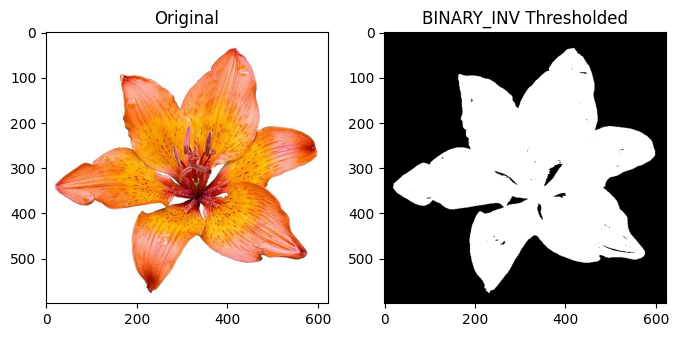

In [ ]:
img_ori = cv.imread('/content/drive/MyDrive/lily.jpg')

img = cv.cvtColor(img_ori,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


img_arr = np.array(img_gray)

# Apply thresholding using NumPy
threshold_value = 200

# Create a binary image with inverse thresholding
# img_arr image must be grayscale
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 0
        else:
            img_thresholded[i, j] = 255


# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Asli')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('Citra Segment')
plt.show()



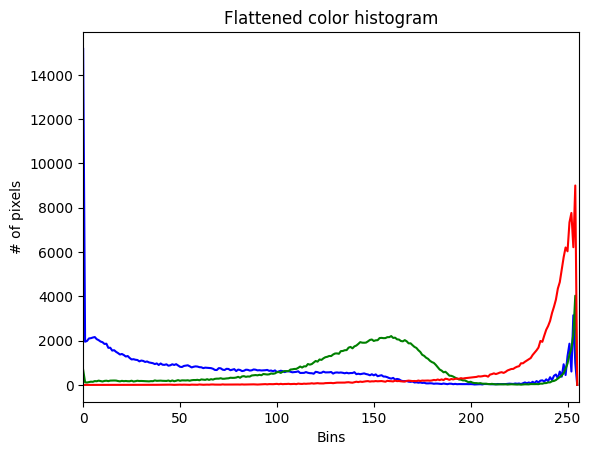

-1

In [ ]:
chans = cv.split(img)
colors = 'b', 'g', 'r'

plt.figure()
plt.title('Flattened color histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

for (chan, color) in zip(chans, colors):
  #set to None -> not use mask
    hist = cv.calcHist([chan], [0], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    

plt.show()
cv.waitKey(0)

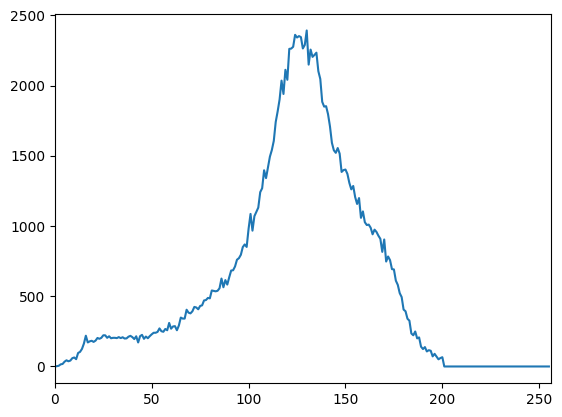

In [ ]:

# Apply mask to extract foreground pixels
fg_pixels = cv.bitwise_and(img_gray, img_thresholded)

# Compute histogram of foreground pixels
hist = cv.calcHist([fg_pixels],[0],img_thresholded,[256],[0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

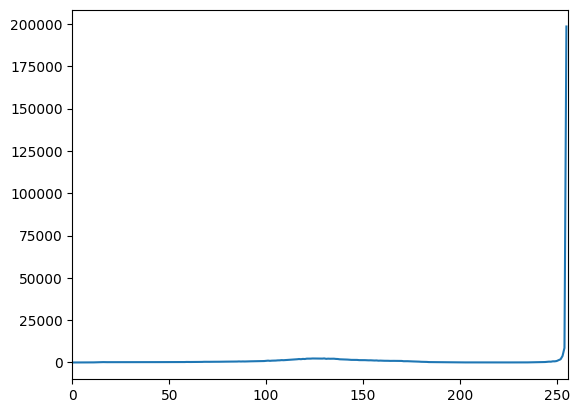

In [ ]:
# Create binary mask
ret, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY)

# Apply mask to extract foreground pixels
fg_pixels = cv.bitwise_and(img_gray, mask)

# Compute histogram of foreground pixels
hist = cv.calcHist([fg_pixels],[0],mask,[256],[0,256])

# Plot histogram
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

#no. 5 Open the crossword.jpg file. With the knowledge of thresholding that you have learned. Perform binary thresholding with the best results in your opinion. Copy the code and image results in this module.

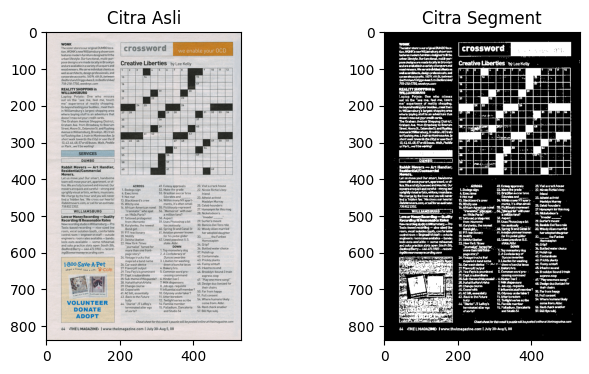

In [ ]:
img_ori = cv.imread('/content/drive/MyDrive/crossword.jpg')

img = cv.cvtColor(img_ori,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


img_arr = np.array(img_gray)

# Apply thresholding using NumPy
threshold_value = 200

# Create a binary image with inverse thresholding
# img_arr image must be grayscale
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 0
        else:
            img_thresholded[i, j] = 255


# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Asli')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('Citra Segment')
plt.show()


# no. 4 Perform color segmentation on the image "peppers.jpg", display only yellow colors . (Hint: you can use K-Means to display only certain colors)

In [ ]:
import cv2 as cv
import numpy as np

# Load the image
img = cv.imread('/content/drive/MyDrive/peppers.jpg')

# Convert the image to the HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the lower and upper bounds of the yellow color in the HSV color space
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Threshold the image to extract only the yellow color
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Apply k-means clustering to group the yellow pixels into clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv.KMEANS_RANDOM_CENTERS
n_clusters = 3
compactness, labels, centers = cv.kmeans(hsv[mask > 0].reshape(-1, 3).astype(np.float32), n_clusters, None, criteria, 10, flags)

# Create a mask to display only the pixels belonging to the cluster with the most yellow color
most_yellow_cluster = np.argmax(np.sum(centers, axis=1))
yellow_mask = np.zeros_like(mask)
yellow_mask[labels == most_yellow_cluster] = 255

# Apply the mask to the original image to display only the yellow colors
yellow_img = cv.bitwise_and(img, img, mask=yellow_mask)

# Display the yellow image
cv.imshow('Yellow Image', yellow_img)
cv.waitKey(0)
cv.destroyAllWindows()

IndexError: ignored

In [ ]:
img = cv.imread('/content/drive/MyDrive/jungle.jpg')

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
we will use the function cv.kmeans () that asks array 2D as input, while
the image of the original is an array of 3D
Next we need to flatten the input image array
'''
#reshape array to 2D form
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
The condition for stopping Dr. KMeans' iteration is if the centroid has not
shiftedtoo much position between current interaction with the previous iter
ation (convergent). Because the amount of data that is great, we will stop
iterating when the number of iterations = 100 or epsilon (the difference
between the position of the centroid skrg with the position of the centroid
in the iteration before) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
If you look at the original image , there are 3 main colors (green, blue,
and white / orange). for this experiment we will use 3 clusters for this
image
'''
k = 3
labels, (centers) == cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#Convert centroid point to an integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# Reshape to the original image
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

error: ignored